In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def to_datetime(row):
    year = row['Año']
    trimester = int(row['Trimestre'])
    month = (trimester - 1) * 3 + 1
    return pd.to_datetime(f'{year}-{month}-01')

In [26]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-NACIO-DEL-INTER-FIJO/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)
df_nacional = pd.json_normalize(data, 'result')
df_nacional.columns=df_nacional.iloc[0]
df_nacional = df_nacional.drop(df_nacional.index[0])
df_nacional.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
1,2022,3,76.64,23.95,Jul-Sept 2022
2,2022,2,75.97,23.72,Abr-Jun 2022
3,2022,1,73.88,23.05,Ene-Mar 2022
4,2021,4,73.18,22.81,Oct-Dic 2021
5,2021,3,70.58,21.98,Jul-Sept 2021


In [27]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-51614/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)
df_provincial = pd.json_normalize(data, 'result')
df_provincial.columns=df_provincial.iloc[0]
df_provincial = df_provincial.drop(df_provincial.index[0])
df_provincial.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2022,3,Buenos Aires,78.11
2,2022,3,Capital Federal,122.28
3,2022,3,Catamarca,65.33
4,2022,3,Chaco,43.86
5,2022,3,Chubut,84.38


In [35]:
df_provincial['Accesos por cada 100 hogares'] = df_provincial['Accesos por cada 100 hogares'].astype(float)
df_nacional['Accesos por cada 100 hogares'] = df_nacional['Accesos por cada 100 hogares'].astype(float)

df_provincial['datetime'] = df_provincial.apply(to_datetime, axis=1)
df_nacional['datetime'] = df_nacional.apply(to_datetime, axis=1)

df_provincial.set_index('datetime', inplace=True)
df_nacional.set_index('datetime', inplace=True)

display(df_provincial.head())
display(df_nacional.head())

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
datetime,,,,
2022-07-01,2022,3,BUENOS AIRES,78.11
2022-07-01,2022,3,CAPITAL FEDERAL,122.28
2022-07-01,2022,3,CATAMARCA,65.33
2022-07-01,2022,3,CHACO,43.86
2022-07-01,2022,3,CHUBUT,84.38


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
datetime,,,,,
2022-07-01,2022,3,76.64,23.95,Jul-Sept 2022
2022-04-01,2022,2,75.97,23.72,Abr-Jun 2022
2022-01-01,2022,1,73.88,23.05,Ene-Mar 2022
2021-10-01,2021,4,73.18,22.81,Oct-Dic 2021
2021-07-01,2021,3,70.58,21.98,Jul-Sept 2021


In [ ]:
df_provincial['Provincia'] = df_provincial['Provincia'].str.upper()
df_provincial['Provincia'] = df_provincial['Provincia'].str.replace('Á', 'A')
df_provincial['Provincia'] = df_provincial['Provincia'].str.replace('É', 'E')
df_provincial['Provincia'] = df_provincial['Provincia'].str.replace('Í', 'I')
df_provincial['Provincia'] = df_provincial['Provincia'].str.replace('Ó', 'O')

df_provincial = df_provincial.pivot(columns='Provincia', values='Accesos por cada 100 hogares')

In [41]:
df_provincial['NACIONAL'] = df_nacional['Accesos por cada 100 hogares']
df_internet = df_provincial.copy()
df_internet.head()

Provincia,BUENOS AIRES,CAPITAL FEDERAL,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,...,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN,NACIONAL
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01,54.57,112.25,24.25,20.72,41.24,52.52,22.32,34.37,17.42,18.42,...,44.91,28.70,27.60,9.35,28.94,47.85,16.31,63.97,33.42,49.55
2014-04-01,55.06,113.14,24.70,20.96,41.41,53.45,22.58,34.69,17.54,18.71,...,45.33,28.91,27.78,9.72,29.38,48.39,16.70,64.36,33.94,49.86
2014-07-01,56.75,113.80,24.71,21.11,40.60,54.23,22.79,34.98,17.77,18.37,...,46.20,29.22,27.85,9.71,28.23,49.20,16.49,65.69,33.94,50.67
2014-10-01,56.09,114.90,25.51,21.87,40.25,54.70,23.56,36.03,17.96,19.60,...,45.48,29.53,28.04,9.79,27.80,50.00,17.27,66.14,35.32,50.50
2015-01-01,56.37,114.90,25.11,26.65,37.61,54.70,28.95,42.07,18.12,19.69,...,45.33,30.01,27.55,9.72,27.99,50.24,17.06,74.23,35.08,51.36


In [61]:
df_internet = df_internet[['NACIONAL', 'BUENOS AIRES', 'CAPITAL FEDERAL', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CORDOBA', 'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO',
       'TIERRA DEL FUEGO', 'TUCUMAN']]

In [79]:
df_internet.columns = df_internet.columns.str.title()

In [81]:
df_internet.to_csv('df_internet.csv')

# Ahora traemos la data de ingresos

In [65]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-POR-LA-OPERA-DEL/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)
df_ingresos = pd.json_normalize(data, 'result')
df_ingresos.columns=df_ingresos.iloc[0]
df_ingresos = df_ingresos.drop(df_ingresos.index[0])
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
1,2022,3,"67,055,930",Jul-Sept 2022
2,2022,2,"60,335,724",Abr-Jun 2022
3,2022,1,"55,589,997",Ene-Mar 2022
4,2021,4,"45,467,887",Oct-Dic 2021
5,2021,3,"42,999,944",Jul-Sept 2021


In [66]:
df_ingresos['Ingresos (miles de pesos)'] = df_ingresos['Ingresos (miles de pesos)'].str.replace(',','').astype('int')

In [67]:
df_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     object
 1   Trimestre                  35 non-null     object
 2   Ingresos (miles de pesos)  35 non-null     int32 
 3   Periodo                    35 non-null     object
dtypes: int32(1), object(3)
memory usage: 1.2+ KB


In [68]:
df_ingresos['datetime'] = df_ingresos.apply(to_datetime, axis=1)
df_ingresos.set_index('datetime', inplace=True)
df_ingresos = df_ingresos['Ingresos (miles de pesos)'].astype('float64')
df_ingresos.head()

datetime
2022-07-01    67055930.0
2022-04-01    60335724.0
2022-01-01    55589997.0
2021-10-01    45467887.0
2021-07-01    42999944.0
Name: Ingresos (miles de pesos), dtype: float64

<AxesSubplot:xlabel='datetime'>

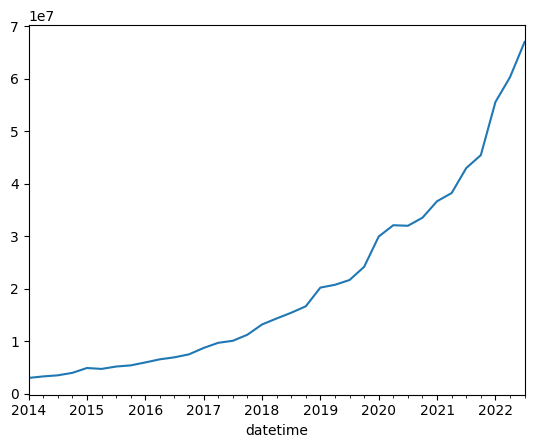

In [69]:
df_ingresos.plot()

In [70]:
df_ingresos.sort_index(inplace=True)

In [71]:
df_ingresos.to_csv('df_ingresos_internet.csv')

In [34]:
df_ingresos = df_ingresos.pct_change() * 100

In [35]:
df_ingresos.to_csv('df_ingresos.csv')

In [25]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-86109/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)
df_ingresos_tv = pd.json_normalize(data, 'result')
df_ingresos_tv.columns=df_ingresos_tv.iloc[0]
df_ingresos_tv = df_ingresos_tv.drop(df_ingresos_tv.index[0])
df_ingresos_tv.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
1,2022,3,"52,242,784.63","27,073,190.89"
2,2022,2,"46,292,673.44","23,559,484.83"
3,2022,1,"42,093,870.19","21,268,086.24"
4,2021,4,"38,273,391.8","18,038,065.44"
5,2021,3,"36,398,025.53","18,039,519.5"


In [26]:
df_ingresos_tv.columns

Index(['Año', 'Trimestre', 'Ingresos TV por suscripción  (miles de $)',
       'Ingresos TV satelital (miles de $)'],
      dtype='object', name=0)

In [27]:
df_ingresos_tv['Total'] = df_ingresos_tv['Ingresos TV por suscripción  (miles de $)'].str.replace(',','').astype('float64') + df_ingresos_tv['Ingresos TV satelital (miles de $)'].str.replace(',','').astype('float64')
df_ingresos_tv.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Total
1,2022,3,"52,242,784.63","27,073,190.89",79315975.52
2,2022,2,"46,292,673.44","23,559,484.83",69852158.27
3,2022,1,"42,093,870.19","21,268,086.24",63361956.43
4,2021,4,"38,273,391.8","18,038,065.44",56311457.24
5,2021,3,"36,398,025.53","18,039,519.5",54437545.03


In [28]:
df_ingresos_tv['datetime'] = df_ingresos_tv.apply(to_datetime, axis=1)
df_ingresos_tv.set_index('datetime', inplace=True)
df_ingresos_tv.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Total
datetime,,,,,
2022-07-01,2022,3,"52,242,784.63","27,073,190.89",79315975.52
2022-04-01,2022,2,"46,292,673.44","23,559,484.83",69852158.27
2022-01-01,2022,1,"42,093,870.19","21,268,086.24",63361956.43
2021-10-01,2021,4,"38,273,391.8","18,038,065.44",56311457.24
2021-07-01,2021,3,"36,398,025.53","18,039,519.5",54437545.03


In [29]:
df_ingresos_tv = df_ingresos_tv['Total']
df_ingresos_tv.head()

datetime
2022-07-01    79315975.52
2022-04-01    69852158.27
2022-01-01    63361956.43
2021-10-01    56311457.24
2021-07-01    54437545.03
Name: Total, dtype: float64

In [30]:
df_ingresos_tv.to_csv('df_ingresos_tv.csv')

## Ahora con los ingresos por telefonía móvil

In [51]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-PREST/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)
df_ingresos_moviles = pd.json_normalize(data, 'result')
df_ingresos_moviles.columns=df_ingresos_moviles.iloc[0]
df_ingresos_moviles = df_ingresos_moviles.drop(df_ingresos_moviles.index[0])
df_ingresos_moviles.head()

,Año,Trimestre,Ingresos (miles de $),Periodo
1,2013,1,"13,135,235",Ene-Mar 2013
2,2013,2,"13,970,806",Abr-Jun 2013
3,2013,3,"15,235,659",Jul-Sept 2013
4,2013,4,"16,218,846",Oct-Dic 2013
5,2014,1,"15,938,353",Ene-Mar 2013


In [52]:
df_ingresos_moviles['datetime'] = df_ingresos_moviles.apply(to_datetime, axis=1)
df_ingresos_moviles.set_index('datetime', inplace=True)
df_ingresos_moviles.head()

,Año,Trimestre,Ingresos (miles de $),Periodo
datetime,,,,
2013-01-01,2013,1,"13,135,235",Ene-Mar 2013
2013-04-01,2013,2,"13,970,806",Abr-Jun 2013
2013-07-01,2013,3,"15,235,659",Jul-Sept 2013
2013-10-01,2013,4,"16,218,846",Oct-Dic 2013
2014-01-01,2014,1,"15,938,353",Ene-Mar 2013


In [53]:
df_ingresos_moviles['Ingresos (miles de $)'] = df_ingresos_moviles['Ingresos (miles de $)'].str.replace(',','').astype('int')

In [54]:
df_ingresos_moviles['Ingresos (miles de $)'].to_csv('df_ingresos_moviles.csv')

## Ahora con telefonia fija

In [55]:
response = requests.get('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/INGRE-TRIME-POR-LA-96059/data.ajson/?auth_key=IoYvqZki0ddbZFn8T7nTAWRZVTVxIUGwH0pm7e35')
#print(response_API.status_code)
data = json.loads(response.text)
df_ingresos_fija = pd.json_normalize(data, 'result')
df_ingresos_fija.columns=df_ingresos_fija.iloc[0]
df_ingresos_fija = df_ingresos_fija.drop(df_ingresos_fija.index[0])
df_ingresos_fija.head()

,Año,Trimestre,Ingresos (miles de $)
1,2014,1,"2,916,071.75"
2,2014,2,"2,974,865.2"
3,2014,3,"3,105,462.02"
4,2014,4,"3,339,690.9"
5,2015,1,"3,260,124.75"


In [56]:
df_ingresos_fija['datetime'] = df_ingresos_fija.apply(to_datetime, axis=1)
df_ingresos_fija.set_index('datetime', inplace=True)
df_ingresos_fija.head()

,Año,Trimestre,Ingresos (miles de $)
datetime,,,
2014-01-01,2014,1,"2,916,071.75"
2014-04-01,2014,2,"2,974,865.2"
2014-07-01,2014,3,"3,105,462.02"
2014-10-01,2014,4,"3,339,690.9"
2015-01-01,2015,1,"3,260,124.75"


In [57]:
df_ingresos_fija['Ingresos (miles de $)'] = df_ingresos_fija['Ingresos (miles de $)'].str.replace(',','').astype('float64')

In [58]:
df_ingresos_fija['Ingresos (miles de $)'].to_csv('df_ingresos_fija.csv')

## Ahora hacemos un total

In [83]:
df_ingresos1 = pd.read_csv('df_ingresos_internet.csv', index_col='datetime', parse_dates=True)
df_ingresos2 = pd.read_csv('df_ingresos_tv.csv', index_col='datetime', parse_dates=True)
df_ingresos3 = pd.read_csv('df_ingresos_moviles.csv', index_col='datetime', parse_dates=True)
df_ingresos4 = pd.read_csv('df_ingresos_fija.csv', index_col='datetime', parse_dates=True)

In [84]:
display(df_ingresos1.head())
display(df_ingresos2.head())
display(df_ingresos3.head())
display(df_ingresos4.head())

,Ingresos (miles de pesos)
datetime,
2014-01-01,2984054.0
2014-04-01,3270816.0
2014-07-01,3478638.0
2014-10-01,3950441.0
2015-01-01,4876385.0


,Total
datetime,
2022-07-01,79315975.52
2022-04-01,69852158.27
2022-01-01,63361956.43
2021-10-01,56311457.24
2021-07-01,54437545.03


,Ingresos (miles de $)
datetime,
2013-01-01,13135235
2013-04-01,13970806
2013-07-01,15235659
2013-10-01,16218846
2014-01-01,15938353


,Ingresos (miles de $)
datetime,
2014-01-01,2916071.75
2014-04-01,2974865.20
2014-07-01,3105462.02
2014-10-01,3339690.90
2015-01-01,3260124.75


In [85]:
df_total = pd.concat([df_ingresos1, df_ingresos2, df_ingresos3, df_ingresos4], axis=1)
df_total.head()

,Ingresos (miles de pesos),Total,Ingresos (miles de $),Ingresos (miles de $)
datetime,,,,
2013-01-01,NaN,NaN,13135235,NaN
2013-04-01,NaN,NaN,13970806,NaN
2013-07-01,NaN,NaN,15235659,NaN
2013-10-01,NaN,NaN,16218846,NaN
2014-01-01,2984054.0,5600705.52,15938353,2916071.75


In [86]:
df_total = df_total['2014-01-01':]
display(df_total.head())
df_total.info()

,Ingresos (miles de pesos),Total,Ingresos (miles de $),Ingresos (miles de $)
datetime,,,,
2014-01-01,2984054.0,5600705.52,15938353,2916071.75
2014-04-01,3270816.0,6395437.38,17680972,2974865.20
2014-07-01,3478638.0,6953805.54,18976053,3105462.02
2014-10-01,3950441.0,7398091.40,20012332,3339690.90
2015-01-01,4876385.0,8313925.45,19337342,3260124.75


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2014-01-01 to 2022-07-01
Freq: QS-OCT
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ingresos (miles de pesos)  35 non-null     float64
 1   Total                      35 non-null     float64
 2   Ingresos (miles de $)      35 non-null     int64  
 3   Ingresos (miles de $)      35 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


In [92]:
df_total.iloc[:,2] = df_total.iloc[:,2].astype('float64')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2014-01-01 to 2022-07-01
Freq: QS-OCT
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ingresos (miles de pesos)  35 non-null     float64
 1   Total                      35 non-null     float64
 2   Ingresos (miles de $)      35 non-null     float64
 3   Ingresos (miles de $)      35 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [93]:
df_total['Total ingresos'] = df_total.iloc[:,0] + df_total.iloc[:,1] + df_total.iloc[:,2] + df_total.iloc[:,3]

In [94]:
df_total.head()

,Ingresos (miles de pesos),Total,Ingresos (miles de $),Ingresos (miles de $),Total ingresos
datetime,,,,,
2014-01-01,2984054.0,5600705.52,15938353.0,2916071.75,27439184.27
2014-04-01,3270816.0,6395437.38,17680972.0,2974865.20,30322090.58
2014-07-01,3478638.0,6953805.54,18976053.0,3105462.02,32513958.56
2014-10-01,3950441.0,7398091.40,20012332.0,3339690.90,34700555.30
2015-01-01,4876385.0,8313925.45,19337342.0,3260124.75,35787777.20


In [95]:
df_total['Total ingresos (variacion %)'] = df_total['Total ingresos'].pct_change() * 100

In [97]:
df_total['Total ingresos (variacion %)'].to_csv('df_total.csv')